In [16]:
import pandas as pd
import numpy as np
import os
from sklearn import linear_model

DIR = os.getcwd()

boston_df = pd.read_csv(os.path.join(DIR, "data", "hw4boston.csv"), 
    names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
)

In [17]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Coreelation Plot
Simple correlation plot -- `RM` and `LSTAT` have highest correlation with response variable `MEDV` (although `LSTAT` is indirectly correlated). 

In [18]:
boston_df.corr().style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406584,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625506,0.582765,0.289946,-0.385063,0.455621,-0.388304
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406584,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625506,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582765,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [19]:
predictor_df = boston_df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]
response_df = boston_df["MEDV"]

In [63]:
model_metrics = []
for pred in predictor_df.columns:
    single_regression = linear_model.LinearRegression()
    X = np.array(predictor_df[pred]).reshape(-1, 1)
    y = np.array(response_df).reshape(-1, 1)
    single_regression.fit(X, y)
    r_squared = single_regression.score(X, y)
    model_metrics.append({"predictors": pred, "r_squared" : r_squared})


In [64]:
single_regression_model_metrics_df = pd.DataFrame(model_metrics)
single_regression_model_metrics_df

,predictors,r_squared
0,CRIM,0.150780
1,ZN,0.129921
2,INDUS,0.233990
3,CHAS,0.030716
4,NOX,0.182603
5,RM,0.483525
6,AGE,0.142095
7,DIS,0.062464
8,RAD,0.145639
9,TAX,0.219526


In [42]:
predictors_w_r_squared_greater_than_30 = ["LSTAT", "RM"]
predictors_w_r_squared_10_to_30 = ["B", "PTRATIO", "TAX", "RAD", "AGE", "NOX", "INDUS", "ZN", "CRIM"]



multi_linear_regr = linear_model.LinearRegression()
multi_linear_regr.fit(predictor_df[predictors_w_r_squared_greater_than_30], response_df)
r_squared = multi_linear_regr.score(predictor_df[predictors_w_r_squared_greater_than_30], response_df)

multi_lm_metrics = [
    {"predictors" : predictors_w_r_squared_greater_than_30, "r_squared" : r_squared}
]
for first_predictor in predictors_w_r_squared_greater_than_30:
    for second_predictor in predictors_w_r_squared_10_to_30:
        predictors = [first_predictor, second_predictor]
        multi_linear_regr = linear_model.LinearRegression()
        multi_linear_regr.fit(predictor_df[predictors], response_df)
        r_squared = multi_linear_regr.score(predictor_df[predictors], response_df)
        multi_lm_metrics.append({"predictors": predictors, "r_squared" : r_squared})

`LSTAT` and `RM` had r-squared of .54 and .48, respectively, in single linear regression models. Looking at below dataframe `PTRATIO` added .06 and .08 to the r-squared of multiple linear regression model including both LSTAT and RM (so, r-squared of LSAT + PTRATIO was .60, and RM + PTRATIO was .56). `TAX` also added .08 when combined with `RM`. 

Add in these combination of variables in the same multiple linear regression model. `LSTAT`, `RM`, and `PTRATIO` performed optimally (`TAX` added to these three variables added little improvement)

In [78]:
three_and_four_variable_regression = [
    ["LSTAT", "RM", "PTRATIO"],
    ["LSTAT", "RM", "TAX"],
    ["LSTAT", "RM", "PTRATIO", "TAX"]
]

for variables in three_and_four_variable_regression:

    multi_linear_regr = linear_model.LinearRegression()
    multi_linear_regr.fit(predictor_df[variables], response_df)
    r_squared = multi_linear_regr.score(predictor_df[variables], response_df)
    multi_lm_metrics.append({"predictors": variables, "r_squared" : r_squared})

multi_lm_df = pd.DataFrame(multi_lm_metrics)
multi_lm_df.sort_values("r_squared", ascending=False)

,predictors,r_squared
27,"[LSTAT, RM, PTRATIO, TAX]",0.679663
24,"[LSTAT, RM, PTRATIO, TAX]",0.679663
21,"[LSTAT, RM, PTRATIO, TAX]",0.679663
19,"[LSTAT, RM, PTRATIO]",0.678624
25,"[LSTAT, RM, PTRATIO]",0.678624
22,"[LSTAT, RM, PTRATIO]",0.678624
26,"[LSTAT, RM, TAX]",0.648515
23,"[LSTAT, RM, TAX]",0.648515
20,"[LSTAT, RM, TAX]",0.648515
0,"[LSTAT, RM]",0.638562


## Interaction Variables

In [53]:
predictor_df_w_interactions = predictor_df.copy()

interaction_lm = []

for idx, first_colname in enumerate(predictor_df):
    for remaining_cols in range(idx + 1, len(predictor_df.columns)):
        #print(idx, col)
        #print(predictor_df_w_interactions.columns[remaining_cols])
        second_colname = predictor_df_w_interactions.columns[remaining_cols]
        predictor_df_w_interactions[f"{first_colname}*{second_colname}"] = predictor_df_w_interactions[first_colname] * predictor_df_w_interactions[second_colname]

        X = np.array(predictor_df_w_interactions[f"{first_colname}*{second_colname}"]).reshape(-1, 1)
        y = np.array(response_df).reshape(-1, 1)


        interaction_linear_regr = linear_model.LinearRegression()
        interaction_linear_regr.fit(X, y)
        r_squared = interaction_linear_regr.score(X, y)
        interaction_lm.append({"predictors": f"{first_colname}*{second_colname}", "r_squared" : r_squared})



In [81]:
interaction_lm_df = pd.DataFrame(interaction_lm).sort_values("r_squared", ascending=False)

interaction_lm_df.head(20)

#len(interaction_lm_df)

,predictors,r_squared
76,PTRATIO*LSTAT,0.563116
56,RM*LSTAT,0.532206
49,NOX*LSTAT,0.490987
74,TAX*LSTAT,0.456187
62,AGE*LSTAT,0.450052
32,INDUS*LSTAT,0.425599
55,RM*B,0.337635
47,NOX*PTRATIO,0.335819
71,RAD*LSTAT,0.306169
77,B*LSTAT,0.278429


In [100]:
full_lm_df = pd.concat([interaction_lm_df, multi_lm_df, single_regression_model_metrics_df]).sort_values("r_squared", ascending=False)
full_lm_df['predictors'] = full_lm_df['predictors'].astype(str)
full_lm_df.drop_duplicates().to_csv(os.path.join(DIR, "full_lm_df.csv"), index=False)
#full_lm_df.sort_values("r_squared", ascending=False).head(25)

#full_lm_df.sort_values("r_squared", ascending=False).drop_duplicates()

In [83]:
final_lm = linear_model.LinearRegression()


final_lm.fit(predictor_df_w_interactions[["INDUS*NOX", "LSTAT", "RM", "PTRATIO"]], response_df)
r_squared = final_lm.score(predictor_df_w_interactions[["INDUS*NOX", "LSTAT", "RM", "PTRATIO"]], response_df)
print(r_squared)

0.6788110153709958


<AxesSubplot: xlabel='MEDV'>

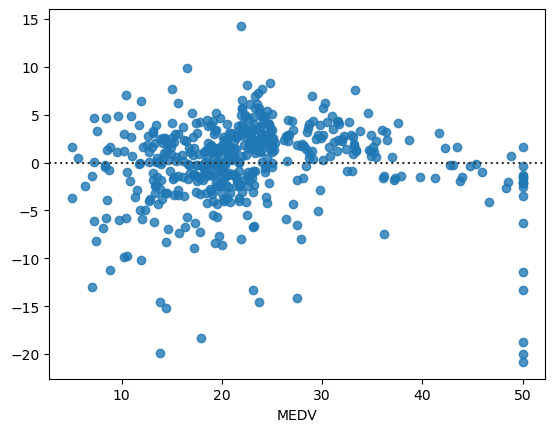

In [87]:
final_lm = linear_model.LinearRegression()
final_lm.fit(predictor_df_w_interactions[["LSTAT", "RM", "PTRATIO"]], response_df)
r_squared = final_lm.score(predictor_df_w_interactions[["LSTAT", "RM", "PTRATIO"]], response_df)

y_predicted = final_lm.predict(predictor_df_w_interactions[["LSTAT", "RM", "PTRATIO"]])

import seaborn as sns

sns.residplot(x=response_df, y=y_predicted)

In [89]:
print(final_lm.intercept_)
print(final_lm.coef_)

18.567111505395257
[-0.57180569  4.51542094 -0.93072256]
